# **Churn Analysis of Telecom Customers**

#### Loading libraries and data

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [115]:
df = pd.read_csv(r"H:\EDA Files_ Excel_ Tableau\Customer Churn.csv")
print('Data loaded successfully.')
df.head(4)

Data loaded successfully.


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No


<br><hr style="border: 1px dotted gray;">

#### Undertanding the data
Each row represents a customer, each column contains customer’s attributes 

#### Data Dictionary
| Column Name          | Description                                                 | Type           | Example Values                                                                             |
| -------------------- | ----------------------------------------------------------- | -------------- | ------------------------------------------------------------------------------------------ |
| **customerID**       | Unique ID assigned to each customer                         | String         | `7590-VHVEG`, `5575-GNVDE`                                                                 |
| **gender**           | Customer gender                                             | Categorical    | `Male`, `Female`                                                                           |
| **SeniorCitizen**    | Whether the customer is a senior citizen (`1`) or not (`0`) | Integer (0/1)  | `0`, `1`                                                                                   |
| **Partner**          | Whether the customer has a partner                          | Categorical    | `Yes`, `No`                                                                                |
| **Dependents**       | Whether the customer has dependents                         | Categorical    | `Yes`, `No`                                                                                |
| **tenure**           | Number of months the customer has stayed with the company   | Numeric        | `1`, `34`, `72`                                                                            |
| **PhoneService**     | Whether the customer has phone service                      | Categorical    | `Yes`, `No`                                                                                |
| **MultipleLines**    | Whether the customer has multiple lines                     | Categorical    | `Yes`, `No`, `No phone service`                                                            |
| **InternetService**  | Type of internet service                                    | Categorical    | `DSL`, `Fiber optic`, `No`                                                                 |
| **OnlineSecurity**   | Whether the customer has online security                    | Categorical    | `Yes`, `No`, `No internet service`                                                         |
| **OnlineBackup**     | Whether the customer has online backup                      | Categorical    | `Yes`, `No`, `No internet service`                                                         |
| **DeviceProtection** | Whether the customer has device protection                  | Categorical    | `Yes`, `No`, `No internet service`                                                         |
| **TechSupport**      | Whether the customer has tech support                       | Categorical    | `Yes`, `No`, `No internet service`                                                         |
| **StreamingTV**      | Whether the customer has streaming TV                       | Categorical    | `Yes`, `No`, `No internet service`                                                         |
| **StreamingMovies**  | Whether the customer has streaming movies                   | Categorical    | `Yes`, `No`, `No internet service`                                                         |
| **Contract**         | Customer's contract term                                    | Categorical    | `Month-to-month`, `One year`, `Two year`                                                   |
| **PaperlessBilling** | Whether the customer uses paperless billing                 | Categorical    | `Yes`, `No`                                                                                |
| **PaymentMethod**    | Payment method used by the customer                         | Categorical    | `Electronic check`, `Mailed check`, `Bank transfer (automatic)`, `Credit card (automatic)` |
| **MonthlyCharges**   | Amount charged to the customer monthly                      | Float          | `29.85`, `70.70`, `105.65`                                                                 |
| **TotalCharges**     | Total amount charged to the customer                        | Float/String\* | `29.85`, `1889.5`, `6844.5`                                                                |
| **Churn**            | Whether the customer has churned                            | Categorical    | `Yes`, `No`                                                                                |


#### About the Dataset
This dataset contains details about telecom customers and helps us understand their behavior, especially those who have left the service (churned). Here's what the data includes:
- **Churn Information**:
  - It tells us whether the customer has recently left the company (shown in the Churn column).
- **Services Used by Customers**:
   - It shows which services each customer has taken, like ```phone service, multiple lines, internet connection, online security, online backup, device  protection, technical support, and streaming services``` (TV and movies).
- **Account-Related Details**:
  - We can also see how long the customer has been with the company, their ```contract type```, whether they use ```paperless billing```, their payment method, ```monthly charges, and total charges```.
- **Customer Demographics**:
  - Basic information like ```gender, age category, and whether the person has a partner or dependents``` is also included.

<br><hr style="border: 1px dotted gray;">

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [117]:
pd.set_option('display.max_columns', None)

In [118]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [119]:
df.duplicated().sum()

0

In [120]:
# check deplicate based on customerID column
df['customerID'].duplicated().sum()

0

In [121]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

##### There is no Null Values and no duplicates in this dataset.

<br><hr style="border: 1px dotted gray;">

#### Handling TotalCharges Column (Data Cleaning Step)
- The **TotalCharges** column appears with data type object, even though it contains numerical values. This is because some rows have **Blank entries** (i.e., empty strings) in this column. These blanks are primarily associated with customers who have a tenure of 0 — meaning they are new customers who have not been billed yet.
- Since **Blank** strings cannot be directly converted to **float**, attempting to cast the column using astype('float64') results in a ValueError.
- To resolve this, we first replace blank strings with **NaN** or **'0'**, and then convert the column to float type. This ensures the column is treated numerically in further analysis.
- ```So, this is the the reason behind replacing blanks and converting the data type of the TotalCharges column.```
- First, We filtered the TotalCharges column to identify rows with blank or missing values, which typically correspond to customers with a tenure of 0.

In [122]:
df[df['TotalCharges']== ' '][['customerID', 'tenure', 'TotalCharges']]

,customerID,tenure,TotalCharges
488,4472-LVYGI,0,
753,3115-CZMZD,0,
936,5709-LVOEQ,0,
1082,4367-NUYAO,0,
1340,1371-DWPAZ,0,
3331,7644-OMVMY,0,
3826,3213-VVOLG,0,
4380,2520-SGTTA,0,
5218,2923-ARZLG,0,
6670,4075-WKNIU,0,


<br><hr style="border: 1px dotted gray;">

In [123]:
# Replace blank strings with '0'
df['TotalCharges'] = df['TotalCharges'].replace(' ', '0')

# Now convert to float
df['TotalCharges'] = df['TotalCharges'].astype('float64')

<br><hr style="border: 1px dotted gray;">

In [124]:
df.groupby('Partner')['Churn'].value_counts().reset_index()

,Partner,Churn,count
0,No,No,2441
1,No,Yes,1200
2,Yes,No,2733
3,Yes,Yes,669


<br><hr style="border: 1px dotted gray;">

###### **SeniorCitizen**:
- ```SeniorCitizen = 1``` → Senior customer (older person). ```(Age >= 60, usually)```    
- ```SeniorCitizen = 0``` → Non-senior customer. ```(Age < 60)```

In [125]:
df.groupby('SeniorCitizen')['Churn'].value_counts()              # my

SeniorCitizen  Churn
0              No       4508
               Yes      1393
1              No        666
               Yes       476
Name: count, dtype: int64

In [126]:
df.groupby('SeniorCitizen')['Churn'].value_counts().reset_index()

,SeniorCitizen,Churn,count
0,0,No,4508
1,0,Yes,1393
2,1,No,666
3,1,Yes,476


<br><hr style="border: 1px dotted gray;">

In [127]:
# Check average bill by Internet type
df.groupby(['SeniorCitizen', 'InternetService'])['MonthlyCharges'].mean()

SeniorCitizen  InternetService
0              DSL                58.475902
               Fiber optic        91.615408
               No                 21.050170
1              DSL                54.982432
               Fiber optic        91.185921
               No                 21.901923
Name: MonthlyCharges, dtype: float64

In [128]:
df.groupby(['SeniorCitizen', 'Contract']).size()

SeniorCitizen  Contract      
0              Month-to-month    3068
               One year          1283
               Two year          1550
1              Month-to-month     807
               One year           190
               Two year           145
dtype: int64

<br><hr style="border: 1px dotted gray;">

In [129]:
df.groupby(['SeniorCitizen', 'Contract', 'Churn']).size()

SeniorCitizen  Contract        Churn
0              Month-to-month  No       1854
                               Yes      1214
               One year        No       1146
                               Yes       137
               Two year        No       1508
                               Yes        42
1              Month-to-month  No        366
                               Yes       441
               One year        No        161
                               Yes        29
               Two year        No        139
                               Yes         6
dtype: int64

<br><hr style="border: 1px dotted gray;">

In [130]:
df.groupby(['SeniorCitizen', 'Contract'])['Churn'].value_counts(normalize=True)

SeniorCitizen  Contract        Churn
0              Month-to-month  No       0.604302
                               Yes      0.395698
               One year        No       0.893219
                               Yes      0.106781
               Two year        No       0.972903
                               Yes      0.027097
1              Month-to-month  Yes      0.546468
                               No       0.453532
               One year        No       0.847368
                               Yes      0.152632
               Two year        No       0.958621
                               Yes      0.041379
Name: proportion, dtype: float64

<br><hr style="border: 1px dotted gray;">

In [131]:
def churnConv(data):
    if data == 'Yes': return 1
    else           : return 0

df['Churn_num'] = df['Churn'].apply(churnConv)  

- Churn = Yes (event happened)       → 1
- Churn = No (event did not happen)  → 0

In [132]:
def senior_CitizenConv(value):
    if value == 1 :   return 'Senior'
    else          :   return 'Not Senior'

df['SeniorCitizen_Label'] = df['SeniorCitizen'].apply(senior_CitizenConv)

<br><hr style="border: 1px dotted gray;">

##### Tenure Grouping

In [133]:
df.tenure.max()

72

In [134]:
df.tenure.min()

0

In [135]:
bins = [0, 12, 24, 36, 48, 60, 72]
pd.cut(df.tenure, bins = bins)

0        (0, 12]
1       (24, 36]
2        (0, 12]
3       (36, 48]
4        (0, 12]
          ...   
7038    (12, 24]
7039    (60, 72]
7040     (0, 12]
7041     (0, 12]
7042    (60, 72]
Name: tenure, Length: 7043, dtype: category
Categories (6, interval[int64, right]): [(0, 12] < (12, 24] < (24, 36] < (36, 48] < (48, 60] < (60, 72]]

In [136]:
bins = [0, 12, 24, 36, 48, 60, 72]
labels = ['0–1 yr', '1–2 yr', '2–3 yr', '3–4 yr', '4–5 yr', '5–6 yr']

df['TenureGroup'] = pd.cut(df['tenure'], bins=bins, labels=labels, right=True, include_lowest=True)

<br><hr style="border: 1px dotted gray;">

### 📊 Creating Monthly Charge Categories

To simplify the analysis of continuous numerical column `MonthlyCharges`, we are going to group the values into **discrete bins** (categories). 

- The **minimum** and **maximum** values in the `MonthlyCharges` column are 18.25 and 118.75 respectively.
- Based on this range, we will create custom intervals (bins) of monthly charges:  
  `[0–30]`, `(30–60]`, `(60–90]`, and `(90–120]`

- Each bin represents a different level of customer spending per month, and will help in visualizing and analyzing churn behavior across different spending segments.

- We will create a new categorical column called `monthly_charge_category` based on these bins, using the `pd.cut()` method in pandas.

- This will allow us to compare customer churn and behavior **based on spending level** rather than raw numeric charges.


In [137]:
monthly_charge_bins = [0, 30, 60, 90, 120]
monthly_charge_levels = ['Low Charge', 'Medium Charge', 'High Charge', 'Very High Charge']

df['monthly_charge_category'] = pd.cut(df['MonthlyCharges'],
                                       bins=monthly_charge_bins,
                                       labels=monthly_charge_levels,
                                       include_lowest=True)


#### ✅ Monthly Charge Categories Created

We have successfully created a new column `monthly_charge_category` based on the `MonthlyCharges` column.

This column categorizes each customer into one of the following charge levels:

- **Low Charge**: $0 – $30
- **Medium Charge**: $30 – $60
- **High Charge**: $60 – $90
- **Very High Charge**: $90 – $120

This transformation makes it easier to analyze patterns and trends in customer churn based on how much they are paying per month, instead of working with continuous numerical values.

We can now proceed to analyze churn rates, customer behavior, or service preferences across these charge groups using visualizations or group-based statistics.


In [138]:
df.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_num,SeniorCitizen_Label,TenureGroup,monthly_charge_category
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,Not Senior,0–1 yr,Low Charge


<br><hr style="border: 1px dotted gray;">

#### Customer Payment Category (based on TotalCharges)
To simplify the analysis of the continuous numerical column **TotalCharges**, we are going to group its values into discrete bins (categories).
- The minimum and maximum values in the TotalCharges column are **0.0 and 8648.8**, respectively.
- Based on this range, we will create custom intervals (bins) of total customer payment:
  - **[0–1000], (1000–3000], (3000–6000], (6000–9000]**

- Each bin represents a different level of total amount paid by the customer since the start of their service, and helps us understand customer value   segments from a business perspective.
- We will **create a new categorical column called customer_payment_category** based on these bins using the pd.cut() method from pandas.

In [139]:
total_charge_bins = [0, 1000, 3000, 6000, 9000]
customer_value_labels = ['Basic', 'Standard', 'Premium', 'Elite']

df['customer_payment_category'] = pd.cut(df['TotalCharges'],
                                         bins = total_charge_bins,
                                         labels = customer_value_labels,
                                         include_lowest=True)

###### We have successfully created a new column customer_payment_category based on the TotalCharges column.
- This column categorizes each customer into one of the following segments:
  - **Basic**: Paid up to ₹1000
  - **Standard**: Paid between ₹1001 and ₹3000
  - **Premium**: Paid between ₹3001 and ₹6000
  - **Elite**: Paid between ₹6001 and ₹9000
- This conversion makes it easier to identify patterns in churn, customer loyalty, or tenure based on how much the customer has spent overall.

<br><hr style="border: 1px dotted gray;">

In [140]:
def classifyFamilyStatus(data):
    if data['Partner'] == 'Yes' and data['Dependents'] == 'Yes':
        return 'Full Family'
    elif data['Partner'] == 'Yes':
        return 'Couple'
    elif data['Dependents'] == 'Yes':
        return 'With Dependents'
    else:
        return 'Single'

df['FamilyStatus'] = df.apply(classifyFamilyStatus, axis=1)

In [141]:
df.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_num,SeniorCitizen_Label,TenureGroup,monthly_charge_category,customer_payment_category,FamilyStatus
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,Not Senior,0–1 yr,Low Charge,Basic,Couple


<br><hr style="border: 1px dotted gray;">

In [142]:
# Convert Yes/No to 1/0
df['Partner_num'] = df['Partner'].map({'Yes': 1, 'No': 0})
df['Dependents_num'] = df['Dependents'].map({'Yes': 1, 'No': 0})

# Create numeric family count column
df['FamilySize'] = df['Partner_num'] + df['Dependents_num']

In [143]:
df = df[['customerID', 'gender', 'SeniorCitizen', 'SeniorCitizen_Label', 'Partner', 'Partner_num',
       'Dependents', 'Dependents_num', 'tenure', 'TenureGroup', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'monthly_charge_category', 'TotalCharges', 'customer_payment_category',
       'Churn', 'Churn_num', 'FamilyStatus', 'FamilySize']]

In [144]:
df.head(2)

,customerID,gender,SeniorCitizen,SeniorCitizen_Label,Partner,Partner_num,Dependents,Dependents_num,tenure,TenureGroup,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,monthly_charge_category,TotalCharges,customer_payment_category,Churn,Churn_num,FamilyStatus,FamilySize
0,7590-VHVEG,Female,0,Not Senior,Yes,1,No,0,1,0–1 yr,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,Low Charge,29.85,Basic,No,0,Couple,1
1,5575-GNVDE,Male,0,Not Senior,No,0,No,0,34,2–3 yr,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,Medium Charge,1889.50,Standard,No,0,Single,0


In [145]:
df.describe()

,SeniorCitizen,Partner_num,Dependents_num,tenure,MonthlyCharges,TotalCharges,Churn_num,FamilySize
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,0.483033,0.299588,32.371149,64.761692,2279.734304,0.265370,0.782621
std,0.368612,0.499748,0.458110,24.559481,30.090047,2266.794470,0.441561,0.816629
min,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,35.500000,398.550000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,29.000000,70.350000,1394.550000,0.000000,1.000000
75%,0.000000,1.000000,1.000000,55.000000,89.850000,3786.600000,1.000000,1.000000
max,1.000000,1.000000,1.000000,72.000000,118.750000,8684.800000,1.000000,2.000000


<br><hr style="border: 1px dotted gray;">

#### Data visualization

#### Heatmap 

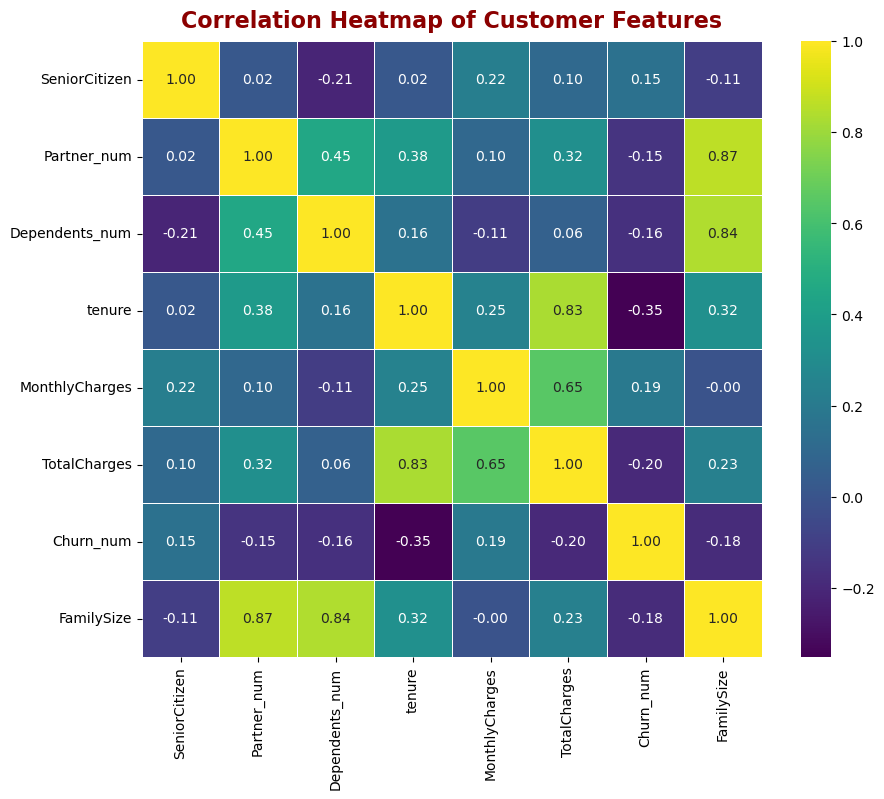

In [146]:
plt.figure(figsize=(10, 8))
           
sns.heatmap(df.corr(numeric_only = True), annot=True, fmt='.2f', cmap='viridis', cbar=True,
            linewidths=0.5, linecolor='white')

plt.title("Correlation Heatmap of Customer Features", fontsize=16, fontweight='bold', color= 'darkred', pad=10)
plt.show()

#### Insights
- **Strong Positive Correlations**:
  - tenure and TotalCharges: 0.83
- **Moderate Positive Correlation**:
  - MonthlyCharges and TotalCharges: 0.65
- **Negative Correlation with Churn**:
   - ```tenure and Churn: -0.35 , means long-term customers are less likely to churn)```
   - ```TotalCharges and Churn: -0.20, means Customers who have paid more money overall are less likely to leave.```
   - ```Churn & FamilySize = -0.18, means Customers who live with more family members are less likely to churn.```

<br><hr style="border: 1px dotted gray;">

#### Churn distribution by Partner 
We made a **countplot** to compare churn behavior of customers **who have a partner vs those who don’t**. To find out whether having a partner affects the chances of a customer leaving the company.

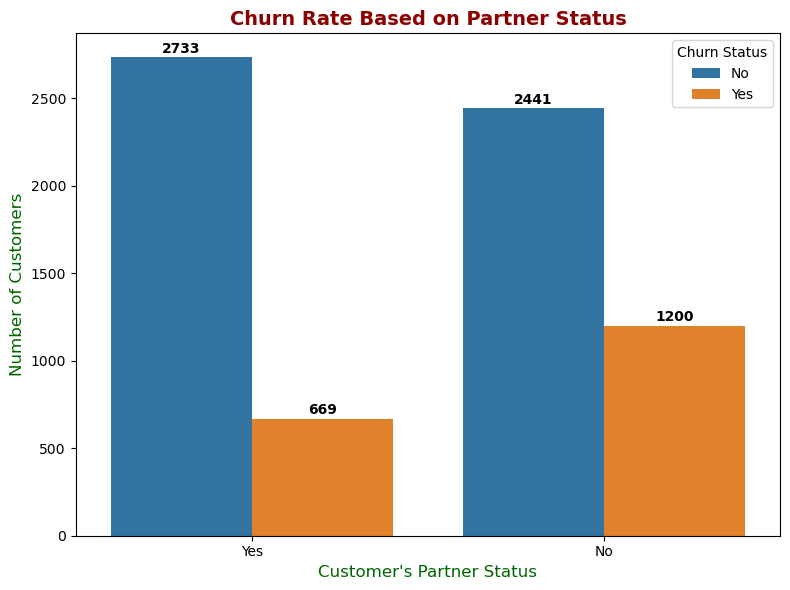

In [147]:
fig, ax = plt.subplots(figsize = (8,6))

ax = sns.countplot(x ='Partner', hue= 'Churn', data= df)

for container in ax.containers:
    ax.bar_label(container, fontsize=10, padding=1, fmt='%d', fontweight='bold')

ax.set_title("Churn Rate Based on Partner Status", fontsize=14, fontweight='bold', color= 'darkred')
ax.set_xlabel("Customer's Partner Status", fontsize=12, color= 'darkgreen')
ax.set_ylabel("Number of Customers", fontsize=12, color= 'darkgreen')
ax.legend(title='Churn Status')
plt.tight_layout()
plt.show()


#### Insights
- Customers **with a partner** have **lower churn** compared to those **without a partner**.
- It suggests that **having a partner might lead to more stable or long-term service use**.

<br><hr style="border: 1px dotted gray;">

##### **Churn Distribution by Dependents**
It compares the number of customers who churned (Yes) vs. who stayed (No), based on whether they have dependents (Yes or No).

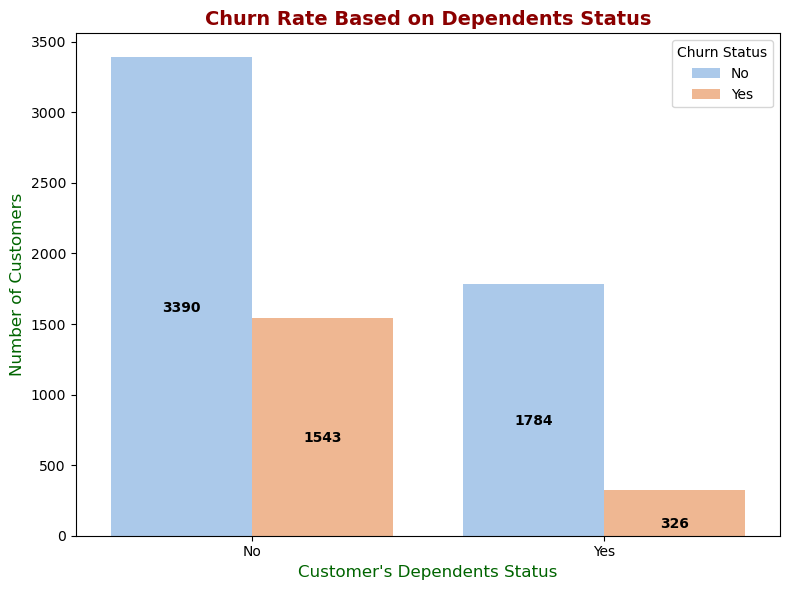

In [148]:
fig, ax = plt.subplots(figsize= (8,6))

ax = sns.countplot(x = 'Dependents', hue='Churn', data=df, palette='pastel')

for container in ax.containers:
    ax.bar_label(container, fontsize=10, label_type = 'center', padding= -8, fmt='%d', fontweight='bold')


ax.set_title("Churn Rate Based on Dependents Status", fontsize=14, fontweight='bold', color= 'darkred')
ax.set_xlabel("Customer's Dependents Status", fontsize=12, color = 'darkgreen')
ax.set_ylabel("Number of Customers", fontsize=12, color = 'darkgreen')
ax.legend(title='Churn Status')
plt.tight_layout()
plt.show()

##### Insights
- Customers **without dependents** have a **higher churn rate.**
- Customers **with dependents** are more likely to stay with the company. This shows that customers with family responsibilities may be more stable or committed.

<br><hr style="border: 1px dotted gray;">

In [149]:
# Grouped count of customers by SeniorCitizen and Churn
senior_churn_df = df.groupby(['SeniorCitizen', 'Churn']).size().reset_index(name='CustomerCount')

# Total customers per SeniorCitizen group
senior_total = senior_churn_df.groupby('SeniorCitizen')['CustomerCount'].transform('sum')

# Percentage churn calculation
senior_churn_df['ChurnPercent'] = (senior_churn_df['CustomerCount'] / senior_total * 100).round(1)

senior_churn_df.reset_index(drop=True)

,SeniorCitizen,Churn,CustomerCount,ChurnPercent
0,0,No,4508,76.4
1,0,Yes,1393,23.6
2,1,No,666,58.3
3,1,Yes,476,41.7


#### **Churn Distribution by Senior Citizen Status**
We created a **countplot** to study churn patterns based on **Senior Citizen status**.

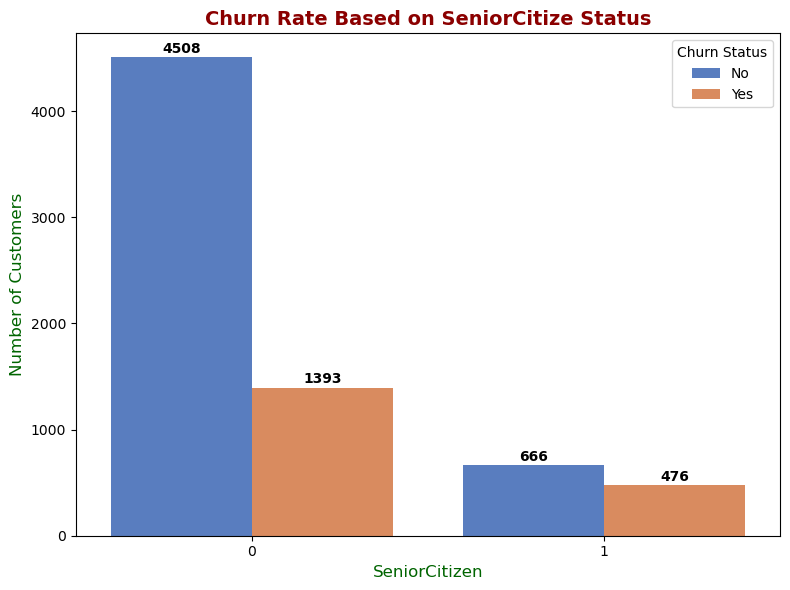

In [150]:
fig, ax = plt.subplots(figsize= (8,6))

ax = sns.countplot(x = 'SeniorCitizen', hue='Churn', data=df, palette= 'muted')

for container in ax.containers:
    ax.bar_label(container, fontsize=10, padding = 1, fmt='%d', fontweight='bold')

ax.set_title("Churn Rate Based on SeniorCitize Status", fontsize=14, fontweight='bold', color= 'darkred')
ax.set_xlabel("SeniorCitizen", fontsize=12, color= 'darkgreen')
ax.set_ylabel("Number of Customers", fontsize=12, color= 'darkgreen')
ax.legend(title='Churn Status')
plt.tight_layout()
plt.show()             

##### Observations
- The bar plot shows churn distribution among **senior citizens and non-senior customers.**
- While **non-seniors customers churned more in total, churn rate is higher for senior citizens (around 42%) compared to non-seniors (around 24%)**.
- **This means senior citizens are more likely to leave the service**, even though they are fewer in number.

<br><hr style="border: 1px dotted gray;">

#### **Churn Distribution by Tenure Group**

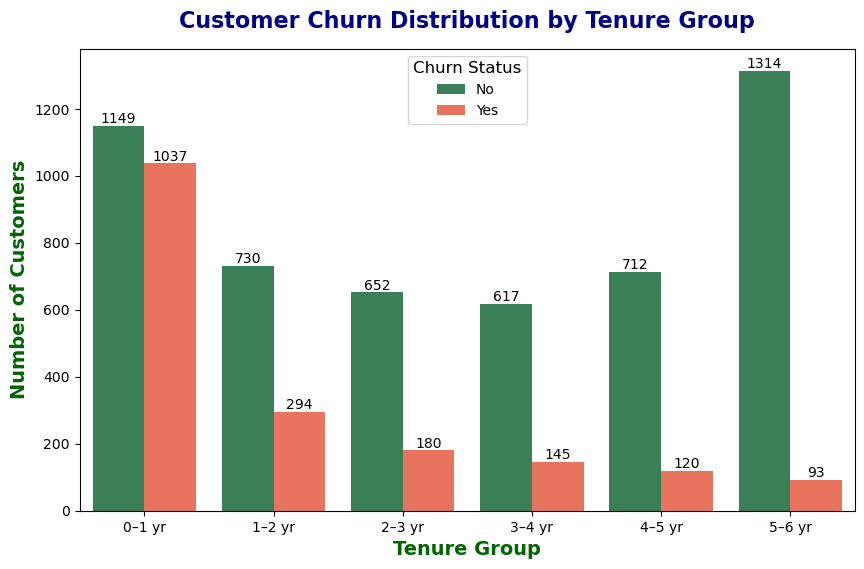

In [151]:
fig, ax = plt.subplots(figsize= (10,6))

ax = sns.countplot(x = 'TenureGroup', hue='Churn', data = df, palette = {'Yes': 'tomato', 'No': 'seagreen'})

for container in ax.containers:
    ax.bar_label(container)

ax.set_title("Customer Churn Distribution by Tenure Group", fontsize=16, color='darkblue', fontweight='bold', pad=15)
ax.set_xlabel("Tenure Group", fontsize=14, color='darkgreen', fontweight='bold')
ax.set_ylabel("Number of Customers", fontsize=14, color='darkgreen', fontweight='bold')
ax.legend(title="Churn Status", title_fontsize=12)
plt.show()       

##### Chart Type & Purpose
We created a **grouped bar chart** using Seaborn's countplot to analyze how customer churn is distributed across different **Tenure Groups.**
- The goal was to visually compare how many customers stayed (Churn = No) and how many left (Churn = Yes) in each tenure group. This helps us understand if new or old customers are more likely to churn.

#####  Insights from the Plot
- Customers in the **0–1 year** group have the **highest churn rate**, meaning most people leave within the first year.
- **As tenure increases, churn decreases**. Long-term customers (4+ years) are less likely to leave. So, customers who stay longer tend to be more loyal.



<br><hr style="border: 1px dotted gray;">

In [152]:
churn_by_senior_contract = df.groupby('SeniorCitizen')[['Contract', 'Churn']].value_counts().reset_index(name = 'Count')
churn_by_senior_contract

,SeniorCitizen,Contract,Churn,Count
0,0,Month-to-month,No,1854
1,0,Two year,No,1508
2,0,Month-to-month,Yes,1214
3,0,One year,No,1146
4,0,One year,Yes,137
5,0,Two year,Yes,42
6,1,Month-to-month,Yes,441
7,1,Month-to-month,No,366
8,1,One year,No,161
9,1,Two year,No,139


#### CatPlot

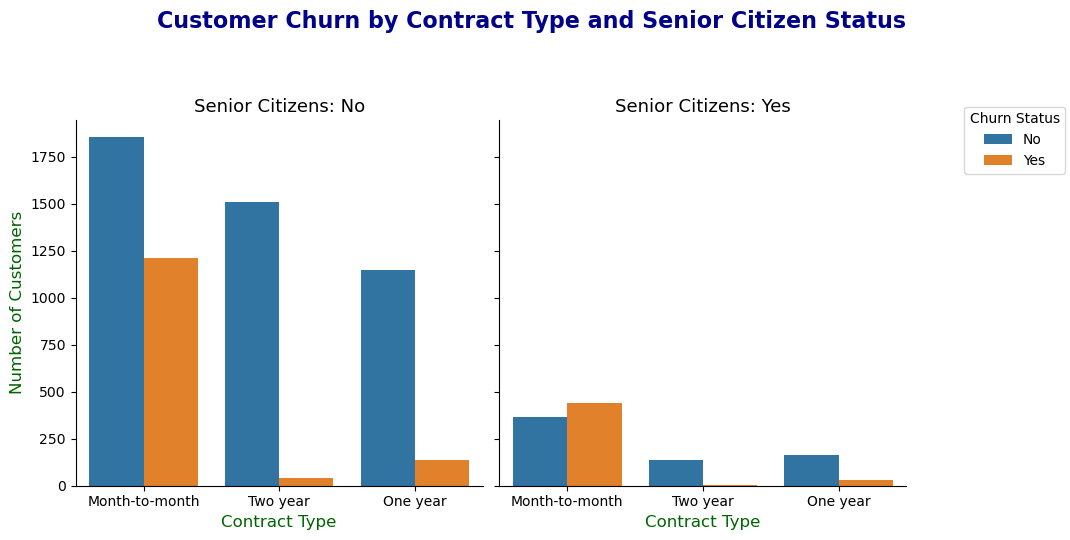

In [153]:

g = sns.catplot(
    data=churn_by_senior_contract,
    x='Contract',
    y='Count',
    hue='Churn',
    col='SeniorCitizen',
    kind='bar',
    height=5,
    aspect=1,
    sharey=True
)

# Set main title for the whole figure
g.fig.suptitle("Customer Churn by Contract Type and Senior Citizen Status", 
               y=1.07, fontsize=16, fontweight='bold', color='darkblue')

# Set subplot titles manually
new_titles = ['Senior Citizens: No', 'Senior Citizens: Yes']
for ax, title in zip(g.axes.flat, new_titles):
    ax.set_title(title, fontsize=13)

# Set common labels
g.set_axis_labels("Contract Type", "Number of Customers", fontsize=12, color='darkgreen')

# Fix legend: move outside and rename it properly
g._legend.set_title("Churn Status")                 
g._legend.set_bbox_to_anchor((1, 0.8))              # Position to the right
g._legend.set_frame_on(True)                        # Optional: legend box border

plt.tight_layout()
plt.subplots_adjust(top=0.85, right=0.85)          # Leave space for title and legend

plt.show()


#### Observations :
- We analyzed customer churn by contract type and senior citizen status using a grouped bar plot.
- The data was grouped by SeniorCitizen, Contract, and Churn, and visualized using Seaborn's catplot.
- The plot shows churn distribution across different contract types, separated into two panels: senior citizens and non-senior citizens.
- Customers on **month-to-month contracts** have the **highest churn rate**, particularly among **senior citizens**.
- In contrast, churn is **significantly lower** for those on **one-year and two-year contracts**, indicating that **long-term contracts help reduce churn**.
- Overall, **senior citizens with flexible contracts** are more prone to churn compared to others.

<br><hr style="border: 1px dotted gray;">

#### **Pie Chart for Customer Churn distribution**

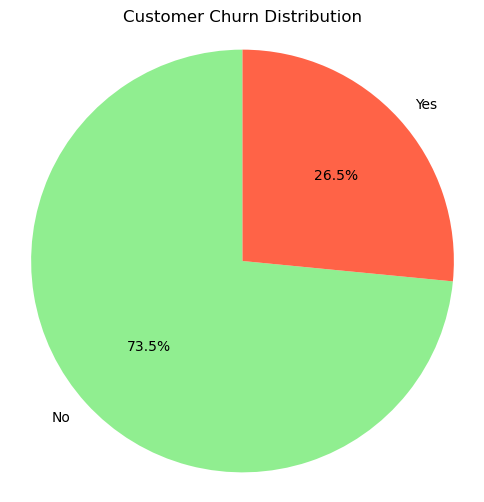

In [154]:
labels = df['Churn'].value_counts().index
sizes = df['Churn'].value_counts().values

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'tomato'])
plt.title('Customer Churn Distribution')
plt.axis('equal')                 # Equal aspect ratio for perfect circle
plt.show()


- We observed :
  - **Majority of customers have not churned**, indicating overall retention is strong.
  - However, **the presence of churned users highlights areas for service improvement and customer engagement**.
  - Churned users act as a warning sign, indicating gaps in service, pricing, or support that may not meet customer expectations.
  - Their exit highlights the need for improving customer experience and engagement to reduce future churn.
  - In short: ***Churn = Warning Sign →  Opportunity to improve service and retain future customers.***

#### Pie Chart for Senior Citizen Distribution

In [155]:
df['SeniorCitizen_Label'].value_counts().reset_index()

,SeniorCitizen_Label,count
0,Not Senior,5901
1,Senior,1142


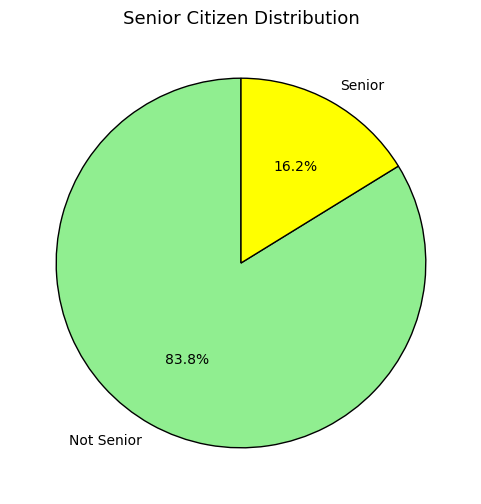

In [156]:
ev = df['SeniorCitizen_Label'].value_counts()
evi = ev.index
evv = ev.values

fig, ax = plt.subplots(figsize = (6,6))
ax.pie(evv, labels = evi, autopct = '%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'}, colors=['lightgreen', 'yellow'])
ax.set_title("Senior Citizen Distribution", fontsize=13)
plt.show()

- From the pie chart, we observe that: 
  - **Most customers are not senior citizens, indicating the service is primarily used by younger or middle-aged users. The smaller senior segment suggests a potential to expand by offering senior-friendly plans or support.**

<br><hr style="border: 1px dotted gray;">

##### Payment Method Analysis

In [157]:
pm_counts = df['PaymentMethod'].value_counts()
pm_counts

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

In [158]:
pmi = pm_counts.index
pmi

Index(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'],
      dtype='object', name='PaymentMethod')

In [159]:
pmv = pm_counts.values
pmv

array([2365, 1612, 1544, 1522], dtype=int64)

#### **Pie Chart: Payment Method Distribution**

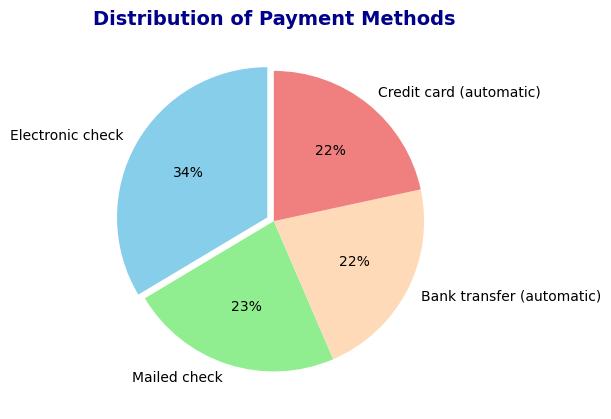

In [160]:
pm_counts = df['PaymentMethod'].value_counts()
pmi = pm_counts.index
pmv = pm_counts.values

colors = ['skyblue', 'lightgreen', 'peachpuff', 'lightcoral']

fig, ax = plt.subplots(figsize=(6,6))
ax.pie(pmv, labels = pmi, autopct='%1.0f%%', startangle=90, explode= [0.05,0,0,0], colors = colors)
ax.set_title("Distribution of Payment Methods", fontsize=14, fontweight='bold', color = 'darkblue')
plt.tight_layout()
plt.show()


##### Observations :
- To understand customer preferences in how they pay for services, we visualized the PaymentMethod column using a pie chart.
- It shows the proportion of different payment methods used by customers.
- The chart clearly **shows the distribution across four payment methods, with a slight "explode" effect to highlight the most frequent method.**
- So, This insight is useful for identifying the most preferred payment options, which can guide business decisions like offering promotions or    improving specific billing methods.

<br><hr style="border: 1px dotted gray;">

##### Payment Method Analysis with Churn Comparison 
To analyze how different payment methods relate to customer churn.


In [161]:
churn_count =  pd.DataFrame(df.groupby('Churn')['PaymentMethod'].value_counts())
churn_count

count
Churn PaymentMethod                   
No    Mailed check                1304
      Electronic check            1294
      Credit card (automatic)     1290
      Bank transfer (automatic)   1286
Yes   Electronic check            1071
      Mailed check                 308
      Bank transfer (automatic)    258
      Credit card (automatic)      232

In [162]:
churn_no_df = churn_count.loc['No']
churn_no_df

,count
PaymentMethod,
Mailed check,1304
Electronic check,1294
Credit card (automatic),1290
Bank transfer (automatic),1286


In [163]:
churn_yes_df = churn_count.loc['Yes']
churn_yes_df

,count
PaymentMethod,
Electronic check,1071
Mailed check,308
Bank transfer (automatic),258
Credit card (automatic),232


In [164]:
churn_ind = churn_yes_df.index
churn_ind

Index(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'],
      dtype='object', name='PaymentMethod')

In [165]:
churn_no = churn_no_df.values.flatten()
churn_no

array([1304, 1294, 1290, 1286], dtype=int64)

In [166]:
churn_yes = churn_yes_df.values.flatten()
churn_yes

array([1071,  308,  258,  232], dtype=int64)

#### **Bar and Line Plot to Compare Total Customers and Churn Distribution across Payment Methods**

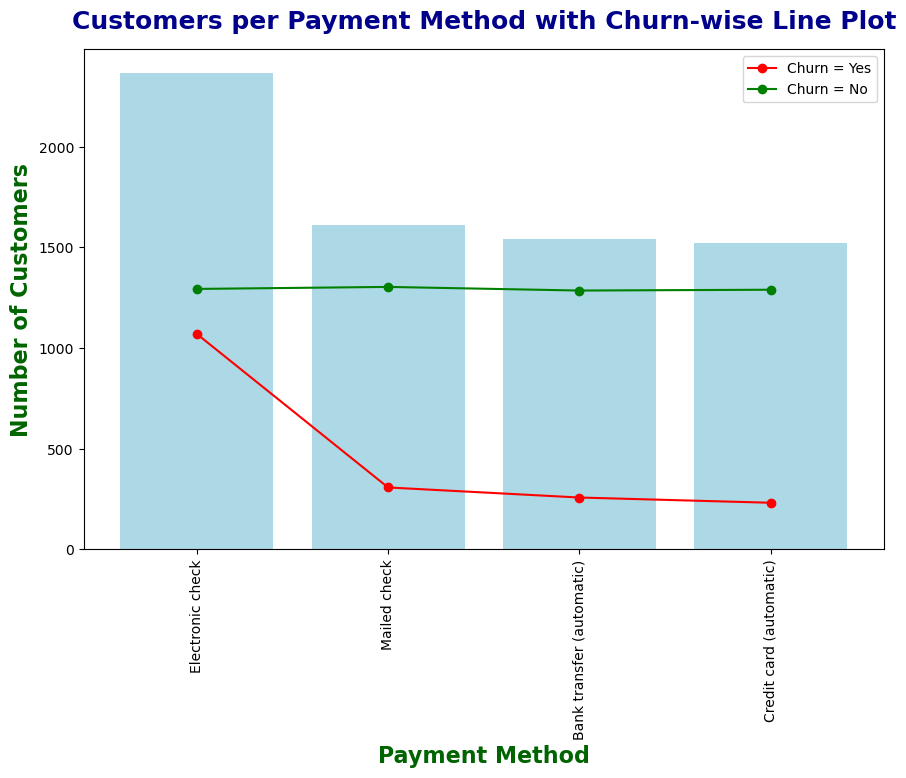

In [167]:
# Total count per PaymentMethod
pm_counts = df['PaymentMethod'].value_counts()
pmi = pm_counts.index.tolist()
pmv = pm_counts.values.tolist()

# Churn-wise count per PaymentMethod
churn_count = pd.DataFrame(df.groupby('Churn')['PaymentMethod'].value_counts())


# Separate churn = 'Yes' and 'No' counts
churn_yes_df = churn_count.loc['Yes']
churn_no_df = churn_count.loc['No']

# Index and values

churn_yes = [churn_yes_df.loc['Electronic check'], churn_yes_df.loc['Mailed check'],
        churn_yes_df.loc['Bank transfer (automatic)'], churn_yes_df.loc['Credit card (automatic)']]

churn_no = [churn_no_df.loc['Electronic check'], churn_no_df.loc['Mailed check'],
        churn_no_df.loc['Bank transfer (automatic)'], churn_no_df.loc['Credit card (automatic)']]

# Plot
fig = plt.figure(figsize=(8,5))
ax = fig.add_axes([0, 0, 1, 1])

# Bar plot: Total customers per PaymentMethod
ax.bar(pmi, pmv, color='lightblue')

# Line plot: Churn = Yes and No
ax.plot(pmi, churn_yes, label='Churn = Yes', marker='o', color='red')
ax.plot(pmi, churn_no, label='Churn = No', marker='o', color='green')


ax.set_xlabel('Payment Method', fontsize=16, fontweight= 'bold', color = 'darkgreen')
ax.set_ylabel('Number of Customers', fontsize=16, fontweight= 'bold', color = 'darkgreen')
ax.set_title('Customers per Payment Method with Churn-wise Line Plot', fontsize=18, color='darkblue', fontweight='bold',pad=15)
plt.xticks(rotation=90)
plt.legend()
plt.show()


##### Observations
- **Electronic Check** has the **most users** and the **highest churn** — indicates high risk.
- **Mailed Check** has **moderate churn** — needs improvement.
- **Bank Transfer (Automatic)** and **Credit Card (Automatic)** show **low churn** — more stable and preferred.
##### **So, Promote automatic payment methods to reduce churn and retain more customers.**

<br><hr style="border: 1px dotted gray;">

#### **Tenure Group-wise Churn Pattern Visualization**

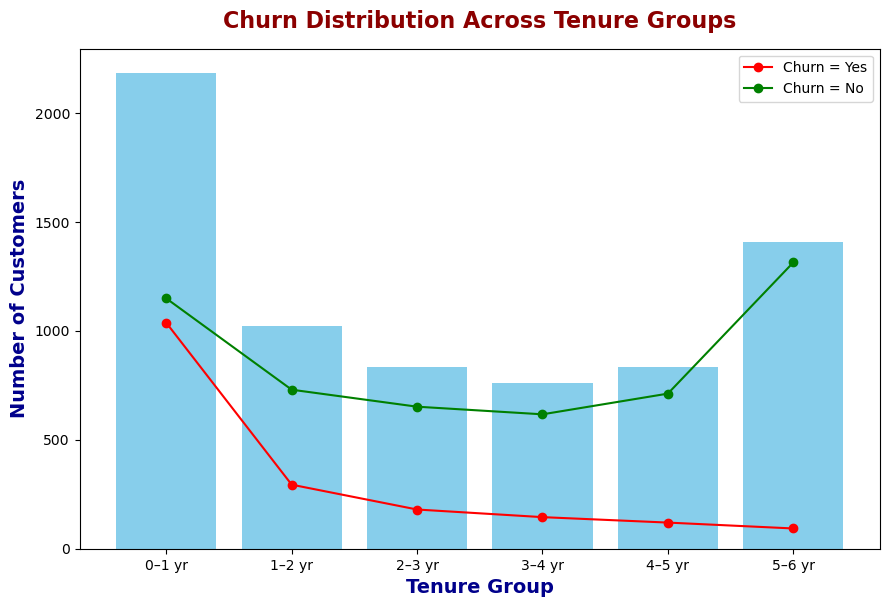

In [168]:

# Step 1: TenureGroup-wise total count
tg_total = df['TenureGroup'].value_counts().sort_index()
tgi = tg_total.index.tolist()
tgv = tg_total.values.tolist()

# Step 2: Churn-wise count within each TenureGroup
tg_churn = pd.DataFrame(df.groupby('Churn')['TenureGroup'].value_counts())

# Step 3: Separate churn Yes and No
tg_yes = tg_churn.loc['Yes'].reindex(tgi).values.flatten()
tg_no = tg_churn.loc['No'].reindex(tgi).values.flatten()

# Step 4: Plot
fig = plt.figure(figsize=(8,5))
ax = fig.add_axes([0, 0, 1, 1])

# Bar plot - Total customers in each TenureGroup
ax.bar(tgi, tgv, color='skyblue')

# Line plots - Churn wise
ax.plot(tgi, tg_yes, label='Churn = Yes', color='red', marker='o')
ax.plot(tgi, tg_no, label='Churn = No', color='green', marker='o')

# Labels and formatting
ax.set_xlabel('Tenure Group', fontsize=14, fontweight='bold', color='darkblue')
ax.set_ylabel('Number of Customers', fontsize=14, fontweight='bold', color='darkblue')
ax.set_title('Churn Distribution Across Tenure Groups', fontsize=16, fontweight='bold', color='darkred', pad=15)
plt.xticks(rotation=0)
plt.legend()
plt.show()


##### Insights 
- **Lower tenure groups (0–12 months) show high churn** — new customers leave early.
- As **tenure increases, churn decreases** — long-term customers are more loyal.
- Customers in the highest tenure group (61–72 months) show very **low churn**.

<br><hr style="border: 1px dotted gray;">

#### Subplots Showing Bar & Pie Plots (Contract Type & Gender)

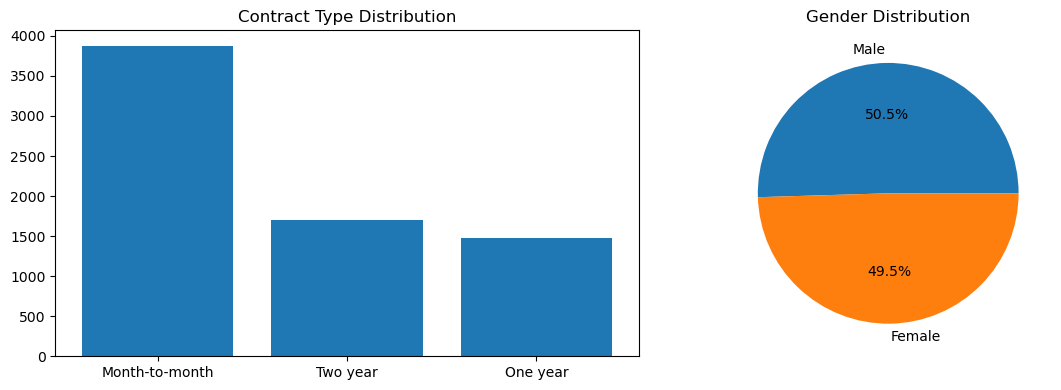

In [169]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Bar plot: Contract type
axes[0].bar(df['Contract'].value_counts().index, df['Contract'].value_counts().values)
axes[0].set_title("Contract Type Distribution")

# Pie plot: Gender
axes[1].pie(df['gender'].value_counts(), labels=df['gender'].value_counts().index, autopct='%1.1f%%')
axes[1].set_title("Gender Distribution")

plt.tight_layout()
plt.show()


##### 📊 Observations from Contract Type & Gender Plots :
1. Two subplots were created side-by-side using plt.subplots(1, 2): one bar plot and one pie chart.
2. The **bar plot** was used to show the distribution of customer contract types — most customers are on **Month-to-month contracts**.
3. The **pie chart** visualized the **gender distribution**, showing that **male and female customers are nearly equal** in proportion.
4. These two subplots together provide a quick comparison of customer **contract preferences and demographic balance**.

<br><hr style="border: 1px dotted gray;">

##### Extracting Value Counts for Service Columns (for Subplots)
We are extracting the unique value counts of all service-related columns and saving them in new variables. These counts will be used later to create subplots and visualize how many customers use each service.

In [170]:
ps = df['PhoneService'].value_counts()
psi = ps.index
psv = ps.values

In [171]:
# Multiple Line
ms = df['MultipleLines'].value_counts()
msi = ms.index
msv = ms.values

In [172]:
ins = df['InternetService'].value_counts()
insi = ins.index
insv = ins.values

In [173]:
ons = df['OnlineSecurity'].value_counts()
onsi = ons.index
onsv = ons.values

In [174]:
onb = df['OnlineBackup'].value_counts()
onbi = onb.index
onbv = onb.values

In [175]:
dp = df['DeviceProtection'].value_counts()
dpi = dp.index
dpv = dp.values

In [176]:
ts = df['TechSupport'].value_counts()
tsi = ts.index
tsv = ts.values

In [177]:
tv = df['StreamingTV'].value_counts()
tv_ind = tv.index
tv_val = tv.values

In [178]:
sm = df['StreamingMovies'].value_counts()
smi = sm.index
smv = sm.values

#### **Service-wise Customer Distribution using Subplots**

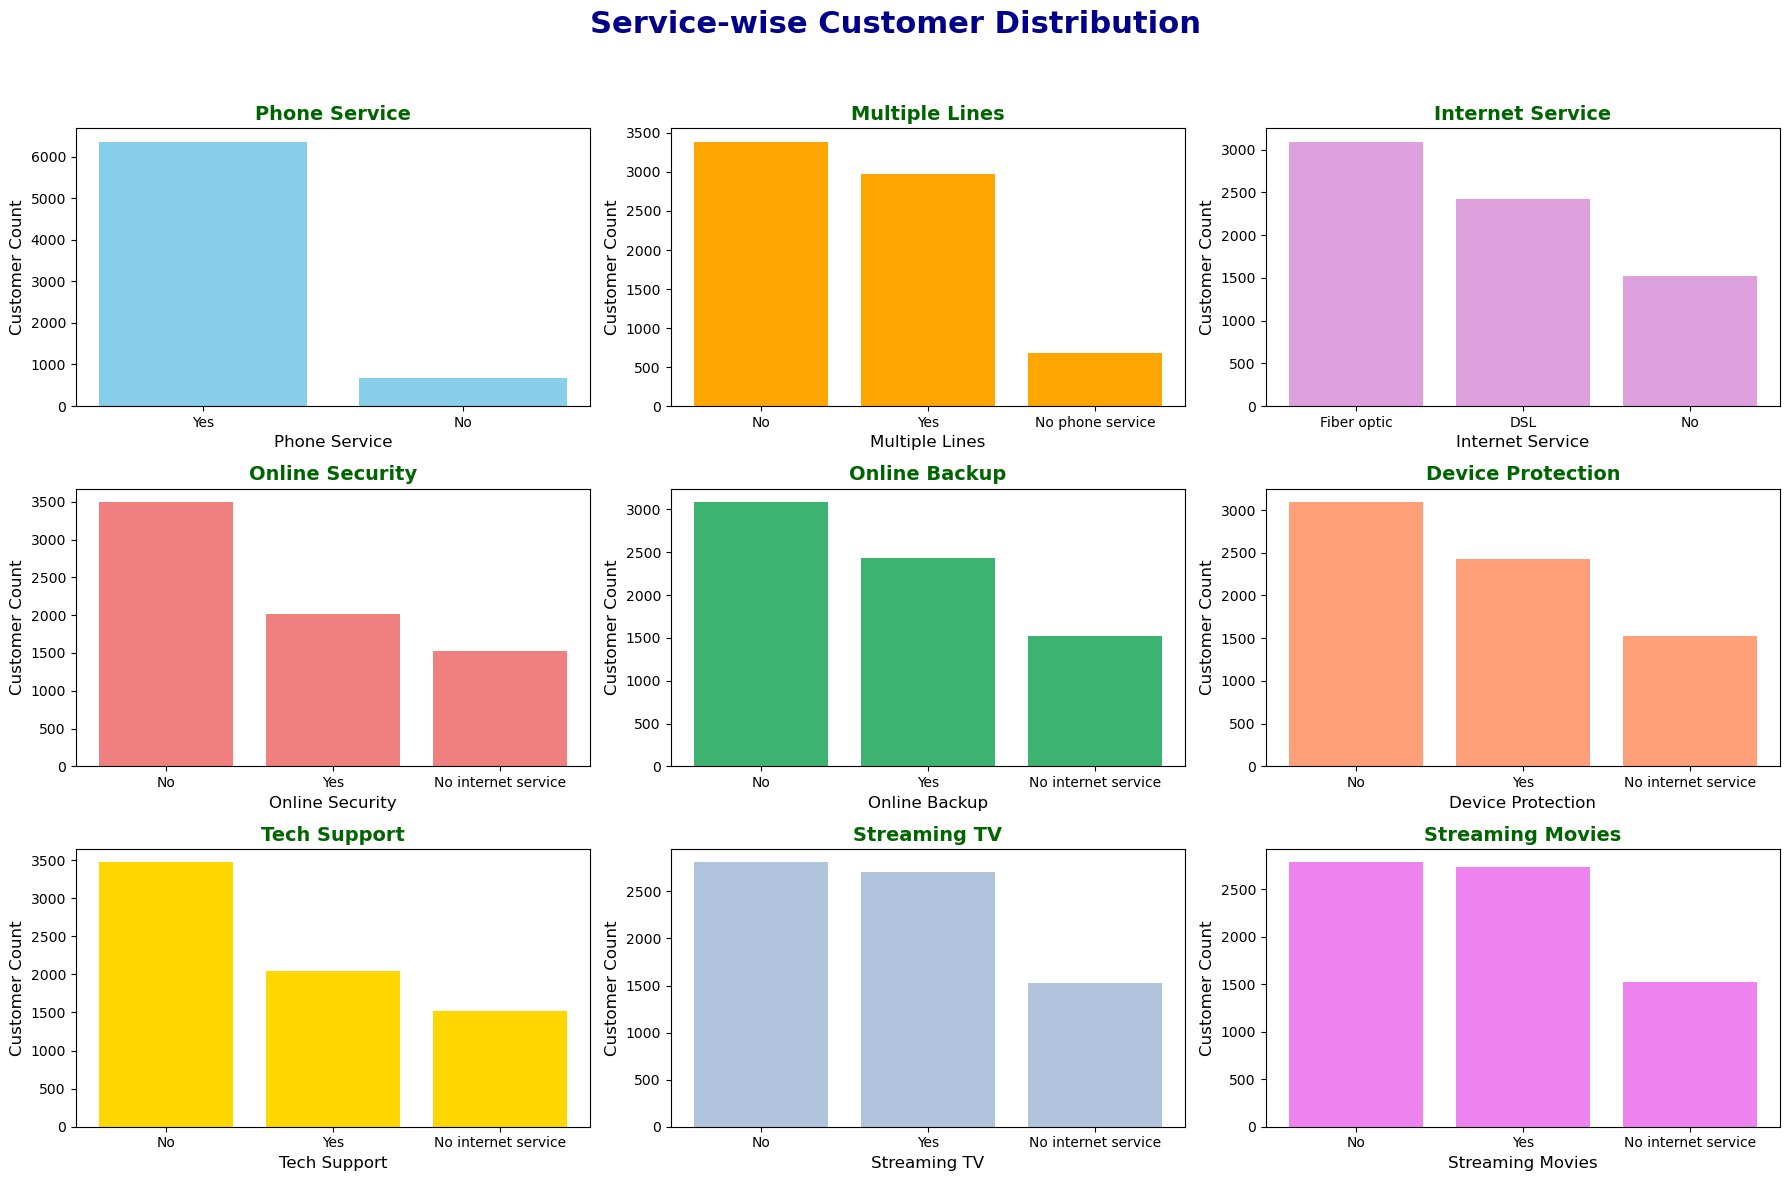

In [179]:

cols = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
        'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']


fig, axes = plt.subplots(3, 3, figsize=(18, 12))
fig.suptitle('Service-wise Customer Distribution', fontsize=22, color='darkblue', fontweight='bold')

# Plot 1: PhoneService
axes[0, 0].bar(psi, psv, color='skyblue')
axes[0, 0].set_title('Phone Service', fontsize=14, fontweight='bold', color='darkgreen')
axes[0, 0].set_xlabel('Phone Service', fontsize=12)
axes[0, 0].set_ylabel('Customer Count', fontsize=12)

# Plot 2: MultipleLines
axes[0, 1].bar(msi, msv, color='orange')
axes[0, 1].set_title('Multiple Lines', fontsize=14, fontweight='bold', color='darkgreen')
axes[0, 1].set_xlabel('Multiple Lines', fontsize=12)
axes[0, 1].set_ylabel('Customer Count', fontsize=12)

# Plot 3: InternetService
axes[0, 2].bar(insi, insv, color='plum')
axes[0, 2].set_title('Internet Service', fontsize=14, fontweight='bold', color='darkgreen')
axes[0, 2].set_xlabel('Internet Service', fontsize=12)
axes[0, 2].set_ylabel('Customer Count', fontsize=12)

# Plot 4: OnlineSecurity
axes[1, 0].bar(onsi, onsv, color= 'lightcoral')
axes[1, 0].set_title('Online Security', fontsize=14, fontweight='bold', color='darkgreen')
axes[1, 0].set_xlabel('Online Security', fontsize=12)
axes[1, 0].set_ylabel('Customer Count', fontsize=12)


# Plot 5: OnlineBackup
axes[1, 1].bar(onbi, onbv, color='mediumseagreen')
axes[1, 1].set_title('Online Backup', fontsize=14, fontweight='bold', color='darkgreen')
axes[1, 1].set_xlabel('Online Backup', fontsize=12)
axes[1, 1].set_ylabel('Customer Count', fontsize=12)


# Plot 6: DeviceProtection
axes[1, 2].bar(dpi, dpv, color= 'lightsalmon')
axes[1, 2].set_title('Device Protection', fontsize=14, fontweight='bold', color='darkgreen')
axes[1, 2].set_xlabel('Device Protection', fontsize=12)
axes[1, 2].set_ylabel('Customer Count', fontsize=12)

# Plot 7: TechSupport
axes[2, 0].bar(tsi, tsv, color = 'gold')
axes[2, 0].set_title('Tech Support', fontsize=14, fontweight='bold', color='darkgreen')
axes[2, 0].set_xlabel('Tech Support', fontsize=12)
axes[2, 0].set_ylabel('Customer Count', fontsize=12)

# Plot 8 : StreamingTV
axes[2, 1].bar(tv_ind, tv_val, color= 'lightsteelblue')
axes[2, 1].set_title('Streaming TV', fontsize=14, fontweight='bold', color='darkgreen')
axes[2, 1].set_xlabel('Streaming TV', fontsize=12)
axes[2, 1].set_ylabel('Customer Count', fontsize=12)

# Plot 9 - StreamingMovies
axes[2, 2].bar(smi, smv, color='violet')
axes[2, 2].set_title('Streaming Movies', fontsize=14, fontweight='bold', color='darkgreen')
axes[2, 2].set_xlabel('Streaming Movies', fontsize=12)
axes[2, 2].set_ylabel('Customer Count', fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

##### Observations :
- **Phone Service**:  Most customers have phone service. Very few are without it.
- **Multiple Lines**:  Single line users are slightly more than users with multiple lines.
- **Internet Service**: ***Fiber optic*** is the ```most used internet type```. Some customers don’t have internet at all.
- **Online Security**:  Many customers ```do not have online security```. Fewer have it active.
- **Online Backup**:  Backup is used by fewer customers. Majority haven’t opted for it.
- **Device Protection**: Customers are almost evenly split — some use protection, others don’t.
- **Tech Support**:  Support services are less popular. More people don’t use them.
- **Streaming TV**:  Streaming TV is common but still many customers don’t use it.
- **Streaming Movies**: Similar to TV — many watch, but many also don’t.


<br><hr style="border: 1px dotted gray;">

#### **Histogram - Distribution of Monthly Charges by Category**
We created a histogram to visualize how customers are spread across different monthly charge ranges. To make it more meaningful, we categorized the monthly charges (like Low, Medium, High) using the monthly_charge_category column and used color-coded bars to represent them.

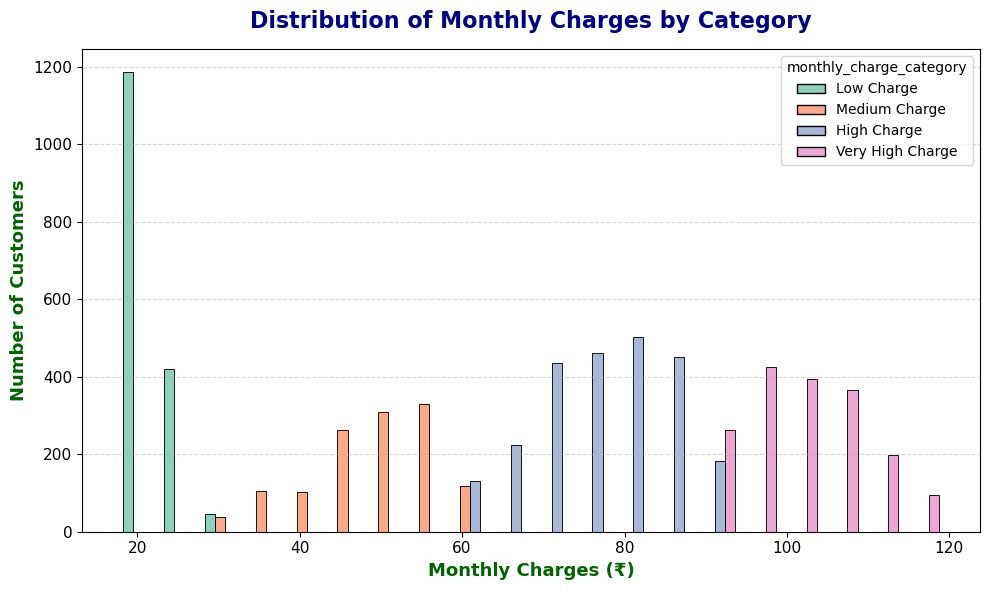

In [180]:
plt.figure(figsize=(10, 6))

sns.histplot(data = df, x = 'MonthlyCharges', hue = 'monthly_charge_category', multiple= 'dodge', bins=20,
             palette='Set2', edgecolor='black')

plt.title('Distribution of Monthly Charges by Category', fontsize=16, fontweight='bold', color='darkblue', pad=15)
plt.xlabel('Monthly Charges (₹)', fontsize=13, fontweight='bold', color='darkgreen')
plt.ylabel('Number of Customers', fontsize=13, fontweight='bold', color='darkgreen')
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

##### Insights
- Most customers fall in the **low to medium charge range** (around ₹20–₹60).
- There are **fewer customers** paying very high monthly charges (above ₹90).
- The **'Medium' category dominates** the customer base compared to 'High'.
- This analysis helps identify how the pricing structure relates to customer volume.

<br><hr style="border: 1px dotted gray;">

#### **Stacked Histogram - Distribution of Tenure by Churn** 
We created a stacked histogram to visualize the distribution of customer tenure for churned and non-churned customers.

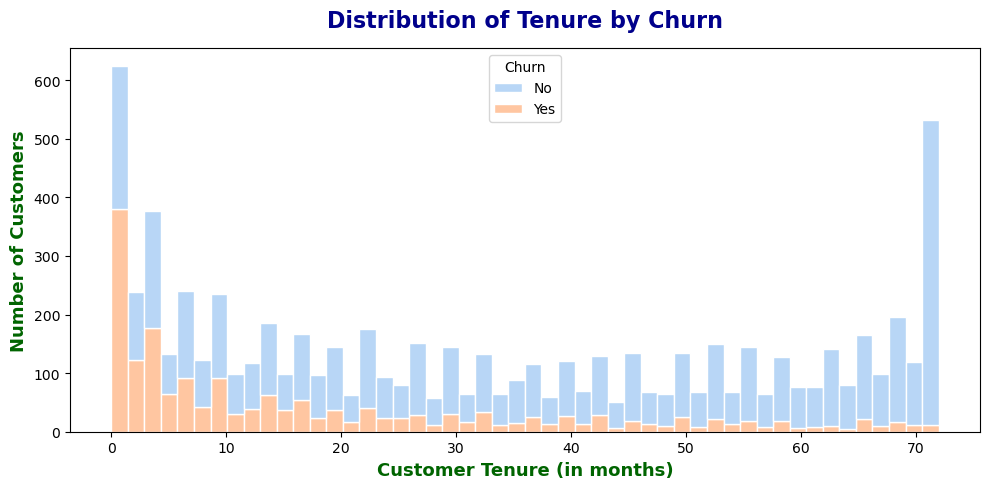

In [181]:
plt.figure(figsize= (10, 5))

sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', bins=50, palette='pastel', edgecolor='white')

plt.title("Distribution of Tenure by Churn", fontsize=16, fontweight='bold', color='darkblue', pad=15)
plt.xlabel("Customer Tenure (in months)", fontsize=13, fontweight='bold', color='darkgreen')
plt.ylabel("Number of Customers", fontsize=13, fontweight='bold', color='darkgreen')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

##### Observations
- Customers with **shorter tenure** (especially less than 12 months) show a **higher churn.**
- As tenure increases, churn decreases, which suggests **long-term customers are more likely to stay.**
- This plot helps us understand the **relation between loyalty (tenure) and churn.**

<br><hr style="border: 1px dotted gray;">

#### Churn Distribution w.r.t. Internet Service and Gender

In [182]:
df[df['gender'] == 'Male'][['InternetService', 'Churn']].value_counts()

InternetService  Churn
DSL              No       993
Fiber optic      No       910
No               No       722
Fiber optic      Yes      633
DSL              Yes      240
No               Yes       57
Name: count, dtype: int64

In [183]:
df[df['gender'] == 'Female'][['InternetService', 'Churn']].value_counts()

InternetService  Churn
DSL              No       969
Fiber optic      No       889
No               No       691
Fiber optic      Yes      664
DSL              Yes      219
No               Yes       56
Name: count, dtype: int64

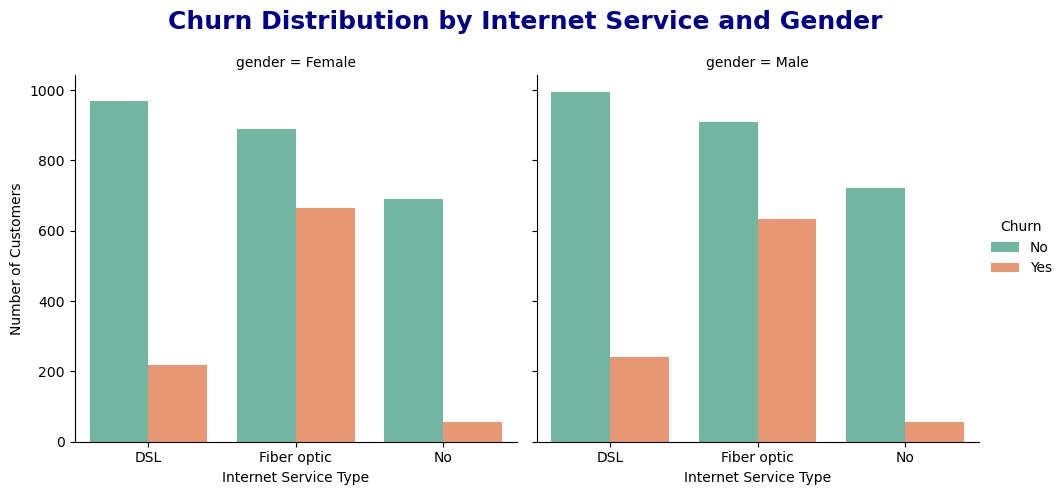

In [184]:
g = sns.catplot(data=df, x='InternetService', hue='Churn', col='gender',
            kind='count', palette='Set2', height=5, aspect=1)

g.fig.suptitle('Churn Distribution by Internet Service and Gender', 
               fontsize=18, fontweight='bold', color='darkblue')

# Adjust spacing so title doesn't overlap
g.fig.subplots_adjust(top=0.85)
g.set_axis_labels('Internet Service Type', 'Number of Customers')


##### Insights
- A lot of customers choose the Fiber optic service and it's also evident that the customers who use **Fiber optic have high churn rate**, this might suggest a **dissatisfaction with this type of internet service.**
- Customers having **DSL service** are majority in number and have **less churn rate** compared to Fibre optic service.

<br><hr style="border: 1px dotted gray;">

#### Kde Plot of Monthly Charges

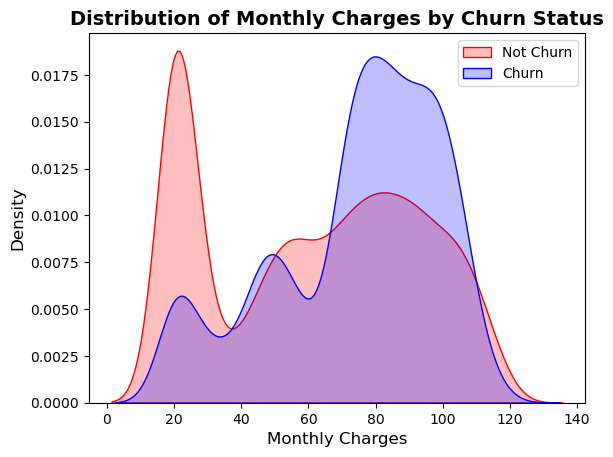

In [185]:
# Step 1: Filter data
monthly_charges_not_churned = df[df['Churn'] == 'No']['MonthlyCharges']
monthly_charges_churned = df[df['Churn'] == 'Yes']['MonthlyCharges']

# Step 2: Create KDE plot
sns.kdeplot(monthly_charges_not_churned, color="red", shade=True)
sns.kdeplot(monthly_charges_churned , color="blue", shade=True)

plt.legend(["Not Churn", "Churn"], loc='upper right')
plt.xlabel("Monthly Charges",  fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("Distribution of Monthly Charges by Churn Status", fontsize=14, fontweight='bold')
plt.show()

plt.show()

#### Observations:
This plot helps visualize how Monthly Charges are distributed for customers who churned vs. who didn’t:
 - **Churned customers** tend to have ```higher``` Monthly Charges.
 - **Not churned customers** are concentrated more in the ```lower Monthly Charges range```.

<br><hr style="border: 1px dotted gray;">

#### Kde Plot of Total Charges

Text(0.5, 1.0, 'Distribution of Total Charges by Churn Status')

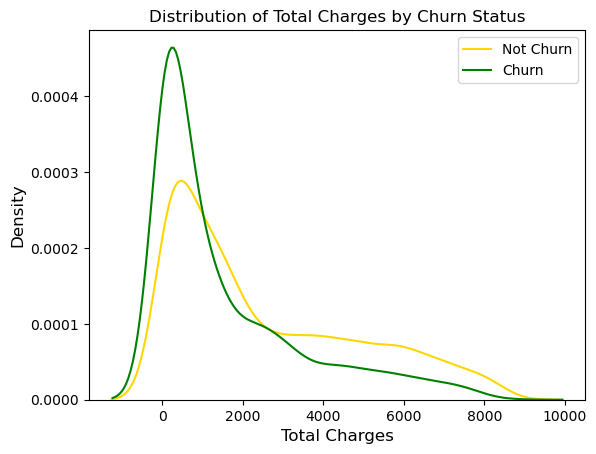

In [186]:
# Step 1: Filter data
total_charges_not_churned = df[df['Churn'] == 'No']['TotalCharges']
total_charges_churned = df[df['Churn'] == 'Yes']['TotalCharges']

ax = sns.kdeplot(total_charges_not_churned, color='Gold', shade = False)
ax = sns.kdeplot(total_charges_churned , color='Green', shade= False)

ax.legend(['Not Churn','Churn'],loc='upper right')
ax.set_xlabel('Total Charges', fontsize=12)
ax.set_ylabel('Density', fontsize=12)
ax.set_title('Distribution of Total Charges by Churn Status')

<br><hr style="border: 1px dotted gray;">

#### **Box Plot (Churn vs tenure)**
In this, we compares how long customers have stayed (tenure in months) based on whether they churned or not.

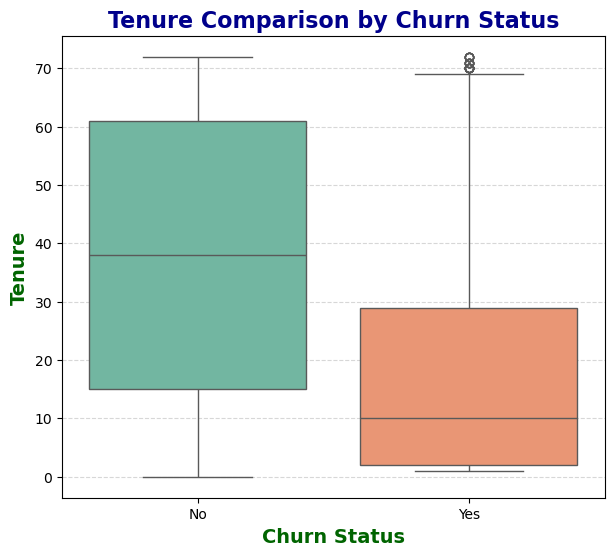

In [187]:
plt.figure(figsize=(7, 6))

sns.boxplot(data = df, x= 'Churn', y = 'tenure',  palette='Set2')
plt.title('Tenure Comparison by Churn Status', fontsize=16, fontweight='bold', color= 'darkblue')
plt.xlabel('Churn Status', fontsize=14, fontweight='bold', color='darkgreen')
plt.ylabel('Tenure', fontsize=14, fontweight='bold', color='darkgreen')

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

#### Obsevation :
The box plot shows that customers who churned generally have **lower tenure**, meaning **new or short-term customers are more likely to leave**. Non-churned customers tend to stay longer. This suggests that **improving early customer experience may help reduce churn**.



<br><hr style="border: 1px dotted gray;">

#### **Box Plot (Churn vs MonthlyCharges)**

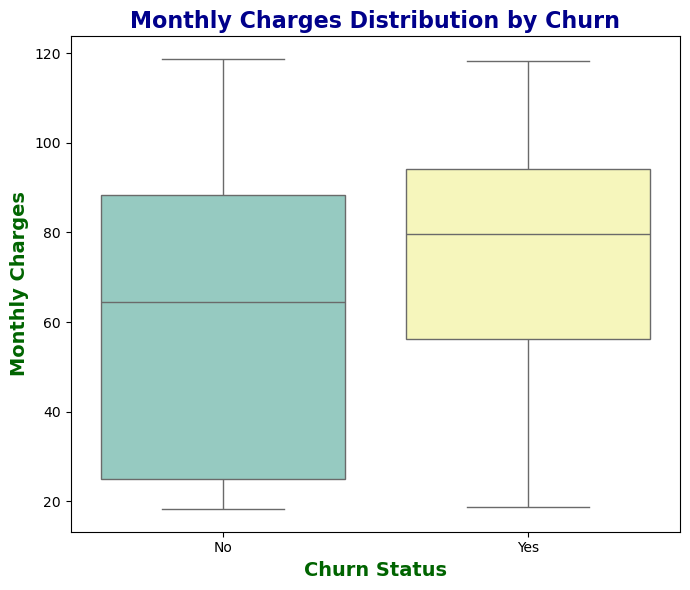

In [188]:
plt.figure(figsize=(7, 6))

sns.boxplot(data = df, x = 'Churn', y = 'MonthlyCharges', palette='Set3')

plt.title('Monthly Charges Distribution by Churn', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Churn Status', fontsize=14, fontweight='bold', color='darkgreen')
plt.ylabel('Monthly Charges', fontsize=14, fontweight='bold', color='darkgreen')
plt.tight_layout()
plt.show()

##### Insights
- Churned customers generally had **higher monthly charges** than non-churned ones.
- The spread of values is wider for churned customers.
- No strong outliers are visible in the plot.

<br><hr style="border: 1px dotted gray;">

#### Payment Method Distribution Using Plotly

In [189]:
import plotly.express as px
import plotly.graph_objects as go

label = df['PaymentMethod'].unique()
size = df['PaymentMethod'].value_counts()

fig = go.Figure(data=[go.Pie(labels= label, values= size, hole= .3)])
fig.update_layout(title={'text': '<b>Payment Method Distribution</b>'}, font = {'size': 20, 'color': 'darkblue'}, width=900, height=700)
fig.show()

<br><hr style="border: 1px dotted gray;">

#### **Violin Plot: Tenure vs Churn by SeniorCitizen**

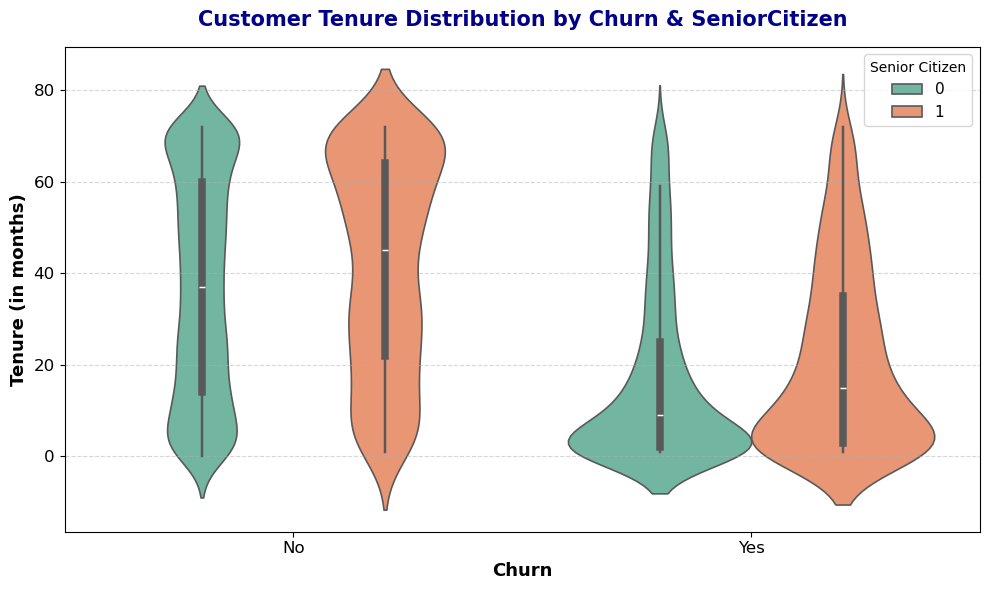

In [190]:
plt.figure(figsize=(10,6))

sns.violinplot(x = 'Churn', y = 'tenure', data = df, hue = 'SeniorCitizen', palette='Set2', split=False, inner='box', linewidth=1.2)  

plt.title("Customer Tenure Distribution by Churn & SeniorCitizen", 
          fontsize=15, fontweight='bold', color='darkblue', pad=15)
plt.xlabel("Churn", fontsize=13, fontweight='bold')
plt.ylabel("Tenure (in months)", fontsize=13, fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(title='Senior Citizen', title_fontsize=10, fontsize=11, loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


##### This violin plot shows how long customers (senior and non-senior) stay with the company before they churn or stay.
- **Churned Customers (Churn = Yes):**
  - Most churned early, especially within **0–15 months**.
  - The violin is widest at the bottom, indicating a high density of early churn.
  - This trend is consistent for both senior and non-senior citizens.
  -  Both ```senior and non-senior customers left early```, indicating **dissatisfaction during the initial months.**
- **Non-Churned Customers (Churn = No):**
  -  Customers who **did not churn** had **much longer tenure** stretching up to **80 months**.
  -  The widest part of the violin is seen around **70 months**, suggesting a high number of loyal long-term users.
  -  **Senior citizens show more spread,** while non-seniors peak near the end of the range.
##### Insights 
- **Senior citizens exhibit a wide spread of tenure values, especially at the lower end.**
This indicates that they tend to **churn gradually across all tenure ranges**, with a **higher concentration in the early months (0–20 months)**, as seen by the wider base of the violin. Means, Senior citizens show a steady churn pattern across all tenure values, with higher early-stage churn.
- **Non-senior citizens show a bimodal churn pattern.**
They either **churn early (0–20 months) or stay long-term (around 70 months)**.This is evident from the **wide base and slight widening again at the top end of the violin plot.**


<br><hr style="border: 1px dotted gray;">

#### **Violin Plot: Monthly Charges Distribution by Churn & Internet Service**
This violin plot compares the distribution of **MonthlyCharges** between **Churn = Yes and Churn = No** customers, segmented by their **Internet Service type** (DSL, Fiber optic, None).

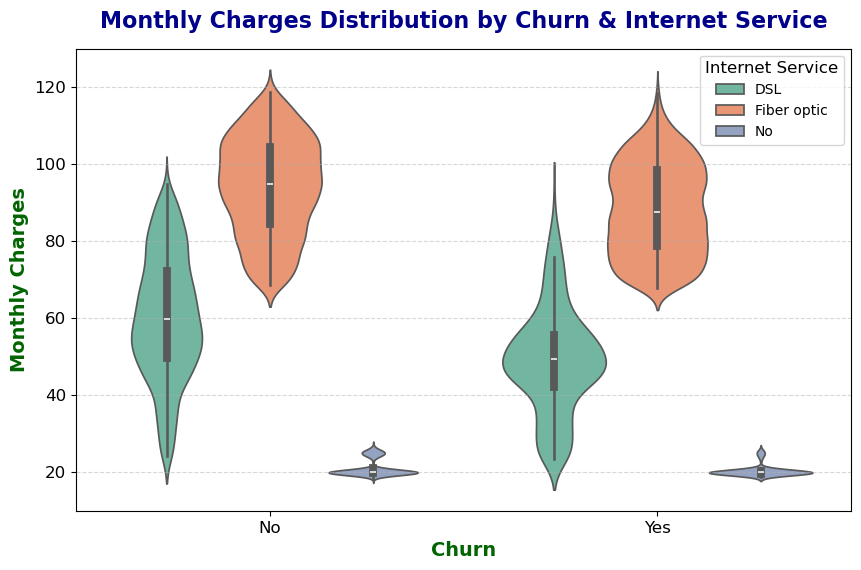

In [191]:
plt.figure(figsize=(10,6))

sns.violinplot(x='Churn', y='MonthlyCharges', hue = 'InternetService', data=df,  palette='Set2')

plt.title("Monthly Charges Distribution by Churn & Internet Service", fontsize=16, color='darkblue', fontweight='bold', pad=15)
plt.xlabel("Churn", fontsize=14, color='darkgreen', fontweight='bold')
plt.ylabel("Monthly Charges", fontsize=14, color='darkgreen', fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(title="Internet Service", title_fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()



#### Key Insights:
- **Fiber optic users** who churn tend to have ```higher monthly charges (around $80–$100)```, with a wide spread.
- **Non-churned fiber users** have slightly lower charges and ```more concentrated distribution.```
- **DSL users**, whether churned or not, generally pay less (around $45–$60), and show more compact distributions.
- **Customers with no internet service** have very low or no monthly charges — and are less likely to churn.

<br><hr style="border: 1px dotted gray;">

##### Another View using Violin Plot with `split=True: Comparing Internet Service within each Churn group
This plot uses `split=True` to show both Internet Service types (DSL vs Fiber optic) within each Churn group in a single violin. It helps directly compare how the density of Monthly Charges varies for different services among customers who churned or stayed.


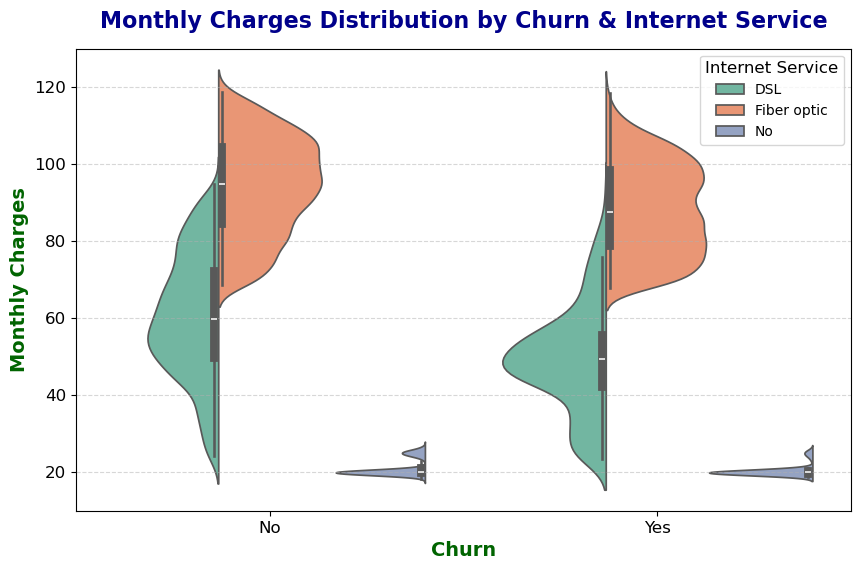

In [192]:
plt.figure(figsize=(10,6))

sns.violinplot(x='Churn', y='MonthlyCharges', hue = 'InternetService', data=df,  palette='Set2', split=True)

plt.title("Monthly Charges Distribution by Churn & Internet Service", fontsize=16, color='darkblue', fontweight='bold', pad=15)
plt.xlabel("Churn", fontsize=14, color='darkgreen', fontweight='bold')
plt.ylabel("Monthly Charges", fontsize=14, color='darkgreen', fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(title="Internet Service", title_fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()


<br><hr style="border: 1px dotted gray;">

##### **Violen-plot of Customer Tenure Distribution Across Contract Types**

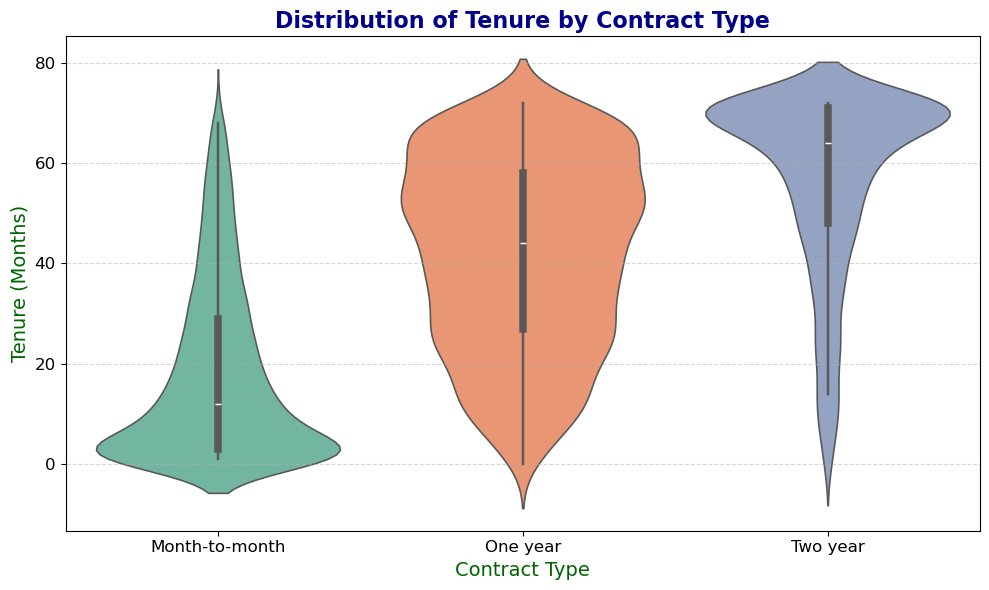

In [193]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Contract', y='tenure', data=df, palette='Set2', linewidth=1.2, inner='box')

plt.title('Distribution of Tenure by Contract Type', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Contract Type', fontsize=14, color='darkgreen')
plt.ylabel('Tenure (Months)', fontsize=14, color='darkgreen')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
    

##### Key insights :
- The plot compares how long customers stay (tenure) based on their contract type.
- **Month-to-month** customers show a wider spread at lower tenure, indicating frequent early churn.
- **One year and Two year** contract customers tend to have longer tenures. 
- Longer contracts clearly retain customers longer, as shown by more density toward higher tenure values
